In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
from collections import Counter
import itertools
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.7 MB/s eta 0:00:00


#Classification Model definitions

In [83]:
class Models:

  def __inint__(self, X_train, y_train, y_test, X_test):
    self.X_train = X_train
    self.y_train = y_train
    self.y_test = y_test
    self.X_test = X_test


  def LR(self, X_train, y_train, y_test, X_test):
    # Create a logistic regression object
    clf = LogisticRegression(random_state=0)
    # Train the model on the training data
    clf.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = clf.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def GNB(self, X_train, y_train, y_test, X_test):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)
    return gnb

  def DT(self, X_train, y_train, y_test, X_test):
    dt = DecisionTreeClassifier(random_state=42,max_depth=2)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def RF(self, X_train, y_train, y_test, X_test):
    rfc = RandomForestClassifier(n_estimators=1, random_state=0,max_depth=2)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def SVC(self, X_train, y_train, y_test, X_test):
    # Create an SVM object
    svc = SVC(random_state=0)
    svc.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = svc.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def KNN(self, X_train, y_train, y_test, X_test):
    # Create a KNN object
    knn = KNeighborsClassifier(n_neighbors=65)
    knn.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = knn.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)


  def GB(self, X_train, y_train, y_test, X_test):
      # Create a Gradient Boosting object
      gb = GradientBoostingClassifier(random_state=0)

      # Hyperparameters to control accuracy
      n_estimators = 40
      learning_rate = 0.001
      max_depth = 2

      gb.set_params(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)

      gb.fit(X_train, y_train)

      # Predict the classes of the testing data
      y_pred = gb.predict(X_test)

      # Evaluate the model performance
      acc = accuracy_score(y_test, y_pred)
      print('Accuracy:', acc)

      cm = confusion_matrix(y_test, y_pred)
      print('Confusion Matrix:\n', cm)

      cr = classification_report(y_test, y_pred)
      print('Classification Report:\n', cr)


  def ADAB(self, X_train, y_train, y_test, X_test):
    # Create an AdaBoost object
    ada = AdaBoostClassifier(random_state=0)
    ada.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = ada.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)

  def BAG(self, X_train, y_train, y_test, X_test):
    # Usage example
    tree_max_depth = 2  # Adjust the max depth of the decision tree as desired (or set it to None for unlimited depth)
    n_estimators = 40
    # Create a Decision Tree object with specified max_depth (if desired)
    tree = DecisionTreeClassifier(max_depth=tree_max_depth, random_state=0)

    # Create a Bagging object with specified number of estimators
    bag = BaggingClassifier(tree, n_estimators=n_estimators, random_state=0)
    bag.fit(X_train, y_train)

    # Predict the classes of the testing data
    y_pred = bag.predict(X_test)
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)


  def XGB(self, X_train, y_train, y_test, X_test):
        # Usage example
    max_depth = 1  # Adjust the maximum depth of each tree in the XGBoost model
    learning_rate = 0.001  # Adjust the learning rate of the XGBoost model
    n_estimators = 40
    # Create an XGBoost object with specified hyperparameters
    xgb = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, random_state=0)
    xgb.fit(X_train, y_train)
    
    # Predict the classes of the testing data
    y_pred = xgb.predict(X_test)
    
    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)




  def LGB(self, X_train, y_train, y_test, X_test):
      # Create a LightGBM object
      lgbm = lgb.LGBMClassifier(random_state=0)
      lgbm.fit(X_train, y_train)

      # Predict the probabilities of the testing data
      y_pred_prob = lgbm.predict_proba(X_test)
      threshold=0.55
      # Apply the threshold to convert probabilities to class labels
      y_pred = np.where(y_pred_prob[:, 1] >= threshold, 1, 0)

      # Evaluate the model performance
      acc = accuracy_score(y_test, y_pred)
      print('Accuracy:', acc)

      cm = confusion_matrix(y_test, y_pred)
      print('Confusion Matrix:\n', cm)

      cr = classification_report(y_test, y_pred)
      print('Classification Report:\n', cr)

  def CB(self, X_train, y_train, y_test, X_test):
      cat = CatBoostClassifier(random_state=0, verbose=0)
    
      # Hyperparameters to control accuracy
      n_estimators = 40
      learning_rate = 0.01
      depth = 3
    
      cat.set_params(n_estimators=n_estimators, learning_rate=learning_rate, depth=depth)
    
      cat.fit(X_train, y_train)

      # Predict the classes of the testing data
      y_pred = cat.predict(X_test)

      # Evaluate the model performance
      acc = accuracy_score(y_test, y_pred)
      print('Accuracy:', acc)

      cm = confusion_matrix(y_test, y_pred)
      print('Confusion Matrix:\n', cm)

      cr = classification_report(y_test, y_pred)
      print('Classification Report:\n', cr)

  def LDA(self, X_train, y_train, y_test, X_test):
    # Create a LinearDiscriminantAnalysis object and fit the model to the training data
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    # Predict the classes of the testing data
    y_pred = lda.predict(X_test)

    # Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)
    return lda

  def QDA(self, X_train, y_train, y_test, X_test):
    #Create a QuadraticDiscriminantAnalysis object
    qda = QuadraticDiscriminantAnalysis()
    #Train the model on the training data
    qda.fit(X_train, y_train)

    #Predict the classes of the testing data
    y_pred = qda.predict(X_test)
    #Evaluate the model performance
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy:', acc)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    cr = classification_report(y_test, y_pred)
    print('Classification Report:\n', cr)


    return qda


In [84]:
#Making object of the class Models
model = Models()

In [5]:

def preprocess(df,target):
  # Split the data into input features (X) and target variable (y)
  X = df.drop(target, axis=1)  # Input features
  y = df[target]  # Target variable
  # Convert the target variable to numeric values using label encoding
  le = LabelEncoder()
  y = le.fit_transform(y)
  cat_cols = X.select_dtypes(include=['category','object']).columns.tolist()

  print(cat_cols)
  # Convert categorical features into numerical values using one-hot encoding
  categorical_cols = cat_cols
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  X_cat = pd.DataFrame(ohe.fit_transform(X[categorical_cols]))
  X_cat.columns = ohe.get_feature_names_out(categorical_cols)
  X_num = X.drop(categorical_cols, axis=1)
  X = pd.concat([X_num, X_cat], axis=1)
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  print("Shape of training split: ", X_train.shape)
  print("Shape of test split: ", X_test.shape)

  return X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le

In [6]:
sem4=pd.read_csv('/content/sem4new.csv')

In [7]:
sem4


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,36,24,24,0,84,A,8,32,P,40,...,10,30,P,529,66.13,0,207,8.28,Pass,A
1,29,29,19,0,77,A,8,32,P,30,...,10,30,P,566,70.75,0,216,8.64,Pass,A+
2,37,30,24,0,91,A+,9,36,P,49,...,10,30,P,633,79.13,0,233,9.32,Pass,A+
3,61,30,25,0,116,O,10,40,P,38,...,10,30,P,645,80.63,0,237,9.48,Pass,A+
4,55,25,13,0,93,A+,9,36,P,37,...,9,27,P,565,70.63,0,217,8.68,Pass,A+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,46,26,24,0,96,A+,9,36,P,46,...,10,30,P,698,87.25,0,242,9.68,Pass,O
396,28,29,18,0,75,A,8,32,P,29,...,10,30,P,558,69.75,0,216,8.64,Pass,A+
397,28,19,18,0,65,B,6,24,P,28,...,10,30,P,497,62.13,0,166,6.64,Fail,B+
398,56,23,22,0,101,O,10,40,P,45,...,9,27,P,591,73.88,0,221,8.84,Pass,A+


In [8]:
sem4.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is in a pandas DataFrame called 'df'
categorical_columns = sem4.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    sem4[column] = label_encoder.fit_transform(sem4[column])

# The categorical columns have been label encoded in place


In [10]:
df3=sem4

In [11]:
sem4

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,36,24,24,0,84,0,8,32,1,40,...,10,30,0,529,66.13,0,207,8.28,0,0
1,29,29,19,0,77,0,8,32,1,30,...,10,30,0,566,70.75,0,216,8.64,0,1
2,37,30,24,0,91,1,9,36,1,49,...,10,30,0,633,79.13,0,233,9.32,0,1
3,61,30,25,0,116,7,10,40,1,38,...,10,30,0,645,80.63,0,237,9.48,0,1
4,55,25,13,0,93,1,9,36,1,37,...,9,27,0,565,70.63,0,217,8.68,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,46,26,24,0,96,1,9,36,1,46,...,10,30,0,698,87.25,0,242,9.68,2,7
396,28,29,18,0,75,0,8,32,1,29,...,10,30,0,558,69.75,0,216,8.64,2,1
397,28,19,18,0,65,2,6,24,1,28,...,10,30,0,497,62.13,0,166,6.64,1,3
398,56,23,22,0,101,7,10,40,1,45,...,9,27,0,591,73.88,0,221,8.84,2,1


In [12]:
sem4= sem4.drop_duplicates()

In [13]:
sem4['63']

0      0
1      1
2      1
3      1
4      1
      ..
395    7
396    1
397    3
398    1
399    0
Name: 63, Length: 400, dtype: int64

#checking the number of entries per label

In [14]:
    y = sem4['63']
    
    # Count the number of samples in each class
    class_counts = y.value_counts()
    print(class_counts)
    # Check if any class has only one sample
    classes_with_single_sample = [class_label for class_label, count in class_counts.items() if count == 1]
    
    # Handle classes with a single sample
    for class_label in classes_with_single_sample:
        # Find the index of the class with a single sample
        index = y[y == class_label].index[0]
        
        # Find the label that is above the class with one sample
        above_label = class_counts[class_counts.index > class_label].index.min()
        
        # Update the target label to the above label
        y.loc[index] = above_label

        # Count the number of samples in each class
    class_counts = y.value_counts()
    print(class_counts)

1    182
0    108
7     58
3     35
2     11
5      4
6      1
4      1
Name: 63, dtype: int64
1    182
0    108
7     59
3     35
2     11
5      5
Name: 63, dtype: int64


In [15]:
y = pd.DataFrame(y)

In [16]:
sem4['63'].unique()

array([0, 1, 7, 3, 2, 5])

<Axes: ylabel='count'>

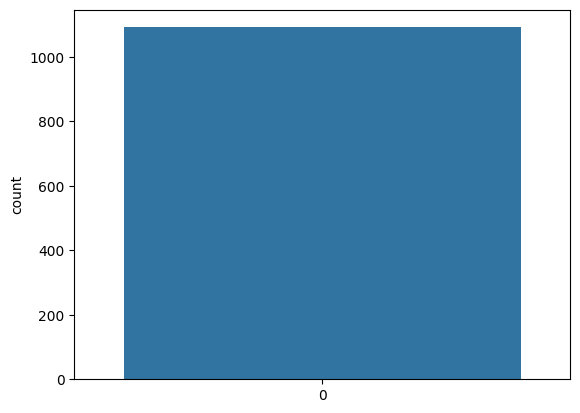

In [17]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Oversampling the data with a specific sampling strategy
smote = SMOTE(random_state=101, k_neighbors=4) 
X, y = smote.fit_resample(sem4.drop('63', axis=1), sem4['63'])

# Creating a new Oversampling DataFrame
sem4os = pd.DataFrame(X, columns=df3.drop('63', axis=1).columns)
sem4os['63'] = y

sns.countplot(sem4os['63'])

In [18]:
sem4os['63'].value_counts()

0    182
1    182
7    182
3    182
2    182
5    182
Name: 63, dtype: int64

#MAking each label to habe 1000 samples using smote

In [19]:
target = '63'

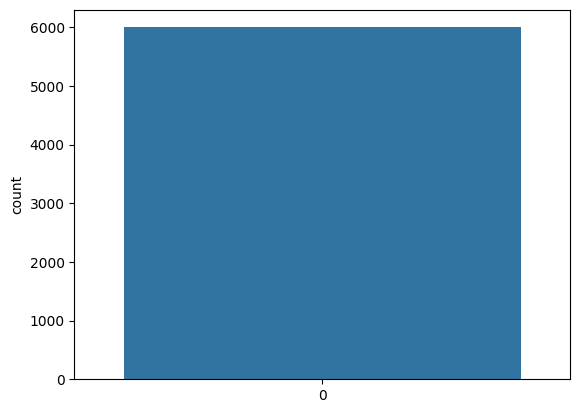

In [20]:
from imblearn.over_sampling import ADASYN
import seaborn as sns

# Perform ADASYN oversampling
adasyn = ADASYN(sampling_strategy='not majority', random_state=101,n_neighbors = 4)
X, y = adasyn.fit_resample(sem4.drop(target, axis=1), sem4[target])

# Create a new oversampled DataFrame
sem4os = pd.DataFrame(X, columns=sem4.drop(target, axis=1).columns)
sem4os[target] = y

# Check the class distribution
sns.countplot(sem4os[target])

# Ensure each label has 1000 rows
label_counts = sem4os[target].value_counts()
for label in label_counts.index:
    label_rows = sem4os[sem4os[target] == label].shape[0]
    if label_rows < 1000:
        additional_rows_needed = 1000 - label_rows
        label_samples = sem4os[sem4os[target] == label].sample(additional_rows_needed, replace=True)
        sem4os = pd.concat([sem4os, label_samples], ignore_index=True)

# Check the updated class distribution
sns.countplot(sem4os[target])

# Save the oversampled data
sem4os.to_csv('oversampled_dataset.csv', index=False)


In [21]:
sem4os['63'].value_counts()

0    1000
1    1000
7    1000
3    1000
2    1000
5    1000
Name: 63, dtype: int64

#SEM 4

In [22]:
target = '63'

In [23]:
X_train, X_test, y_train, y_test,X,categorical_cols,ohe,le = preprocess(sem4os,target)

[]
Shape of training split:  (4800, 63)
Shape of test split:  (1200, 63)


In [28]:
model.BAG(X_train,y_train,y_test,X_test)

Accuracy: 0.8416666666666667
Confusion Matrix:
 [[189   0   0   0   0   0]
 [  0 218   0   0   0   0]
 [  0   0 204   0   0   0]
 [  0   0   0 179   0   0]
 [  0   0   0   0 211   0]
 [  4 173   5   8   0   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       0.56      1.00      0.72       218
           2       0.98      1.00      0.99       204
           3       0.96      1.00      0.98       179
           4       1.00      1.00      1.00       211
           5       1.00      0.05      0.09       199

    accuracy                           0.84      1200
   macro avg       0.91      0.84      0.79      1200
weighted avg       0.91      0.84      0.79      1200



In [29]:
model.XGB(X_train,y_train,y_test,X_test)

Accuracy: 0.9708333333333333
Confusion Matrix:
 [[189   0   0   0   0   0]
 [  0 218   0   0   0   0]
 [  0   0 204   0   0   0]
 [  0   0   0 179   0   0]
 [  0   0   0   0 211   0]
 [  4   9   5   8   9 164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       0.96      1.00      0.98       218
           2       0.98      1.00      0.99       204
           3       0.96      1.00      0.98       179
           4       0.96      1.00      0.98       211
           5       1.00      0.82      0.90       199

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



In [30]:
model.LGB(X_train,y_train,y_test,X_test)

Accuracy: 0.33916666666666667
Confusion Matrix:
 [[189   0   0   0   0   0]
 [  0 218   0   0   0   0]
 [204   0   0   0   0   0]
 [179   0   0   0   0   0]
 [211   0   0   0   0   0]
 [199   0   0   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.19      1.00      0.32       189
           1       1.00      1.00      1.00       218
           2       0.00      0.00      0.00       204
           3       0.00      0.00      0.00       179
           4       0.00      0.00      0.00       211
           5       0.00      0.00      0.00       199

    accuracy                           0.34      1200
   macro avg       0.20      0.33      0.22      1200
weighted avg       0.21      0.34      0.23      1200



In [31]:
model.LR(X_train,y_train,y_test,X_test)

Accuracy: 0.8683333333333333
Confusion Matrix:
 [[156  25   1   7   0   0]
 [ 32 141   0   0   0  45]
 [  0   0 199   0   0   5]
 [  1   7   0 168   0   3]
 [  0   0   0   0 211   0]
 [  0  25   7   0   0 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       189
           1       0.71      0.65      0.68       218
           2       0.96      0.98      0.97       204
           3       0.96      0.94      0.95       179
           4       1.00      1.00      1.00       211
           5       0.76      0.84      0.80       199

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200



In [32]:
model.GNB(X_train,y_train,y_test,X_test)

Accuracy: 0.905
Confusion Matrix:
 [[174   0   0  12   0   3]
 [  6 166   0   0   0  46]
 [  0   0 174   0  30   0]
 [  3   0   0 176   0   0]
 [  0   0   0   0 211   0]
 [  0   0  14   0   0 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       189
           1       1.00      0.76      0.86       218
           2       0.93      0.85      0.89       204
           3       0.94      0.98      0.96       179
           4       0.88      1.00      0.93       211
           5       0.79      0.93      0.85       199

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.90      1200



GaussianNB()

In [72]:
model.DT(X_train,y_train,y_test,X_test)

Accuracy: 0.5025
Confusion Matrix:
 [[  0   0   0 189   0   0]
 [  0   0   0 218   0   0]
 [  0   0 204   0   0   0]
 [  0   0   0 179   0   0]
 [  0   0   0   0 211   0]
 [  0   0   5 185   0   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       189
           1       0.00      0.00      0.00       218
           2       0.98      1.00      0.99       204
           3       0.23      1.00      0.38       179
           4       1.00      1.00      1.00       211
           5       1.00      0.05      0.09       199

    accuracy                           0.50      1200
   macro avg       0.53      0.51      0.41      1200
weighted avg       0.54      0.50      0.41      1200



In [79]:
model.RF(X_train,y_train,y_test,X_test)

Accuracy: 0.5916666666666667
Confusion Matrix:
 [[  0   0   0 154   0  35]
 [  0   0   0  54   0 164]
 [  0   0 159  45   0   0]
 [  0   0  10 165   0   4]
 [  0   0   0   0 211   0]
 [  0   0   9   6   9 175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       189
           1       0.00      0.00      0.00       218
           2       0.89      0.78      0.83       204
           3       0.39      0.92      0.55       179
           4       0.96      1.00      0.98       211
           5       0.46      0.88      0.61       199

    accuracy                           0.59      1200
   macro avg       0.45      0.60      0.49      1200
weighted avg       0.46      0.59      0.50      1200



In [35]:
model.SVC(X_train,y_train,y_test,X_test)

Accuracy: 0.8766666666666667
Confusion Matrix:
 [[161   0   0  28   0   0]
 [ 29 146   0   0   0  43]
 [  0   0 187   0  17   0]
 [  0   0   0 179   0   0]
 [  0   0   0   0 211   0]
 [  4   9   5   4   9 168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       189
           1       0.94      0.67      0.78       218
           2       0.97      0.92      0.94       204
           3       0.85      1.00      0.92       179
           4       0.89      1.00      0.94       211
           5       0.80      0.84      0.82       199

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.87      1200
weighted avg       0.88      0.88      0.87      1200



In [59]:
model.KNN(X_train,y_train,y_test,X_test)

Accuracy: 0.9583333333333334
Confusion Matrix:
 [[178   0   0  11   0   0]
 [ 14 190   0   0   0  14]
 [  0   0 202   0   2   0]
 [  0   0   0 179   0   0]
 [  0   0   0   0 211   0]
 [  4   2   0   0   3 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       189
           1       0.99      0.87      0.93       218
           2       1.00      0.99      1.00       204
           3       0.94      1.00      0.97       179
           4       0.98      1.00      0.99       211
           5       0.93      0.95      0.94       199

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [85]:
model.GB(X_train,y_train,y_test,X_test)

Accuracy: 0.9791666666666666
Confusion Matrix:
 [[189   0   0   0   0   0]
 [  0 218   0   0   0   0]
 [  0   0 204   0   0   0]
 [  0   0   0 179   0   0]
 [  0   0   0   0 211   0]
 [  4   9   4   8   0 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       0.96      1.00      0.98       218
           2       0.98      1.00      0.99       204
           3       0.96      1.00      0.98       179
           4       1.00      1.00      1.00       211
           5       1.00      0.87      0.93       199

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [38]:
model.ADAB(X_train,y_train,y_test,X_test)

Accuracy: 0.7683333333333333
Confusion Matrix:
 [[182   0   0   0   0   7]
 [143   0   0   0   0  75]
 [  0   0 204   0   0   0]
 [  0   0   0 179   0   0]
 [  0   0  50   0 161   0]
 [  0   0   3   0   0 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.96      0.71       189
           1       0.00      0.00      0.00       218
           2       0.79      1.00      0.89       204
           3       1.00      1.00      1.00       179
           4       1.00      0.76      0.87       211
           5       0.71      0.98      0.82       199

    accuracy                           0.77      1200
   macro avg       0.68      0.79      0.71      1200
weighted avg       0.67      0.77      0.70      1200

